In [1]:
#import libraries
import numpy as np  
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve
from sklearn.decomposition import FastICA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE

In [2]:
#Training, Performace evaluation and Ploting
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    trainedforest = RandomForestClassifier(class_weight='balanced').fit(X_Train,Y_Train)
    predictionforest = trainedforest.predict(X_Test)
    print(confusion_matrix(Y_Test,predictionforest))
    print(classification_report(Y_Test,predictionforest))
    fpr_rf, tpr_rf, _ = roc_curve(Y_Test, predictionforest)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    plt.figure(figsize=(8,8))
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()

In [3]:
#Reading Data
df = pd.read_excel('Mini_protein_data_Ha_for_ml.xlsx')

In [4]:
#Defining Lables and Features
#Feature Transformations:- Label encoder and Robust Scaler; Feature Extraction; PCA dimention reduction
X = df.drop(['Category','Category_0_1','Category_0-1_2_3_4','Category_0_1-2_3_4'], axis = 1)
Y = df['Category_0-1_2_3_4']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = RobustScaler().fit_transform(X)    
randomforest = RandomForestClassifier(class_weight='balanced')
randomforest.fit(X,Y) 
sfm = SelectFromModel(randomforest, prefit=True)
X = sfm.transform(X)

Base Non-Tranformed data
[[6837  154]
 [ 239  892]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      6991
           1       0.85      0.79      0.82      1131

    accuracy                           0.95      8122
   macro avg       0.91      0.88      0.90      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


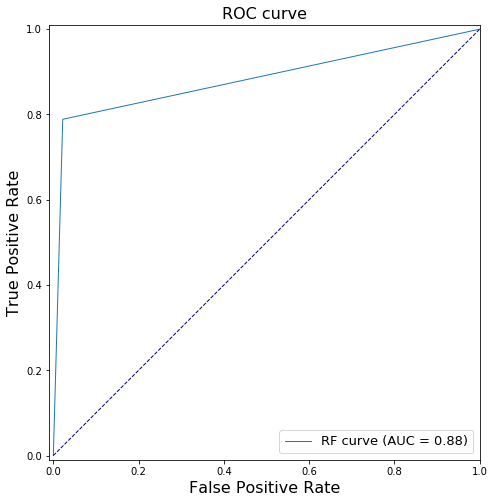

PCA Transformed - 2 dimensions is :-
[3.3479013  2.79326062]
[[6661  330]
 [ 473  658]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      6991
           1       0.67      0.58      0.62      1131

    accuracy                           0.90      8122
   macro avg       0.80      0.77      0.78      8122
weighted avg       0.90      0.90      0.90      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


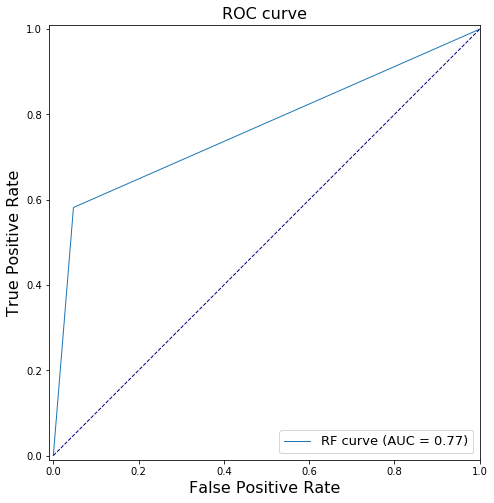

PCA Transformed - 3 dimensions is :-
[3.3479013  2.79326062 2.54042317]
[[6741  250]
 [ 332  799]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      6991
           1       0.76      0.71      0.73      1131

    accuracy                           0.93      8122
   macro avg       0.86      0.84      0.85      8122
weighted avg       0.93      0.93      0.93      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


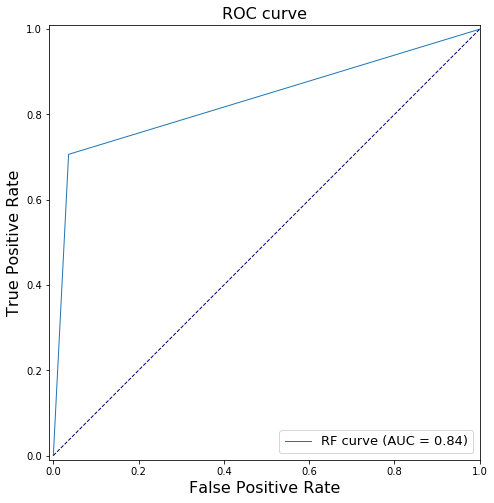

PCA Transformed - 4 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024]
[[6795  196]
 [ 301  830]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      6991
           1       0.81      0.73      0.77      1131

    accuracy                           0.94      8122
   macro avg       0.88      0.85      0.87      8122
weighted avg       0.94      0.94      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


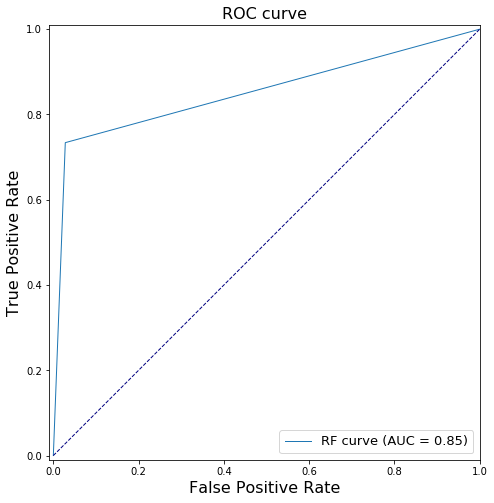

PCA Transformed - 5 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614]
[[6797  194]
 [ 269  862]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6991
           1       0.82      0.76      0.79      1131

    accuracy                           0.94      8122
   macro avg       0.89      0.87      0.88      8122
weighted avg       0.94      0.94      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


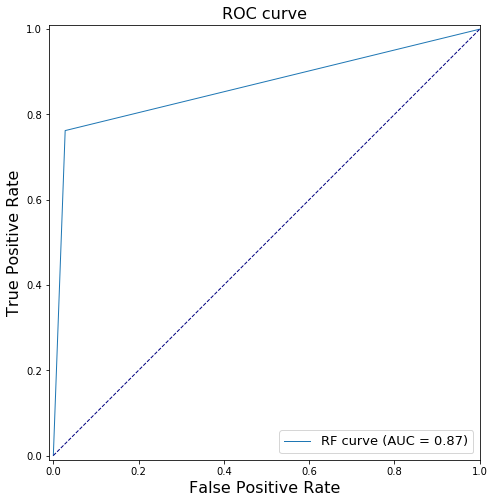

PCA Transformed - 6 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199]
[[6802  189]
 [ 264  867]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6991
           1       0.82      0.77      0.79      1131

    accuracy                           0.94      8122
   macro avg       0.89      0.87      0.88      8122
weighted avg       0.94      0.94      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


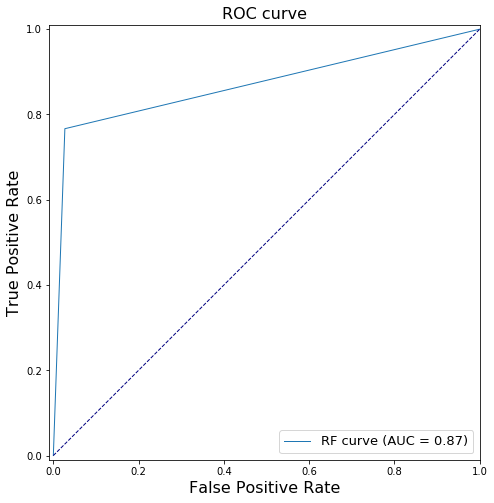

PCA Transformed - 7 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199
 0.80540433]
[[6813  178]
 [ 263  868]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6991
           1       0.83      0.77      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.90      0.87      0.88      8122
weighted avg       0.94      0.95      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


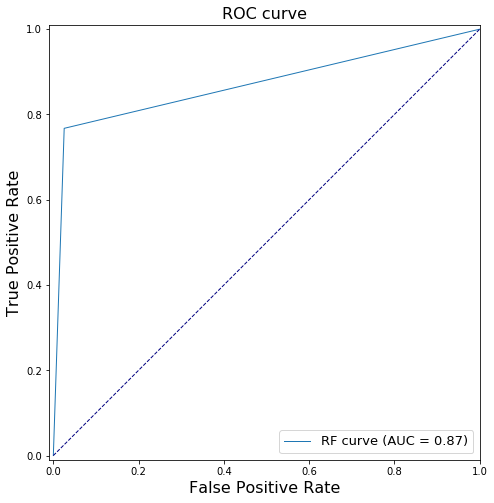

PCA Transformed - 8 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199
 0.80540433 0.70040574]
[[6819  172]
 [ 261  870]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.83      0.77      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.90      0.87      0.88      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


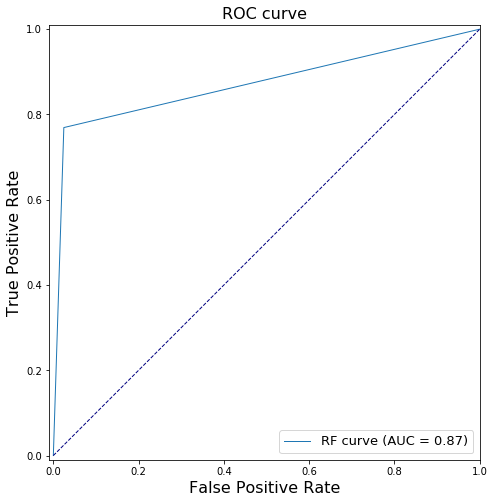

PCA Transformed - 9 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199
 0.80540433 0.70040574 0.42962264]
[[6822  169]
 [ 269  862]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.84      0.76      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.90      0.87      0.88      8122
weighted avg       0.94      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


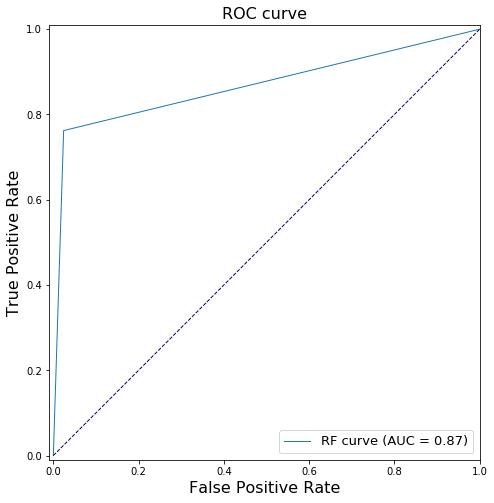

PCA Transformed - 10 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199
 0.80540433 0.70040574 0.42962264 0.39669824]
[[6819  172]
 [ 263  868]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.83      0.77      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.90      0.87      0.88      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


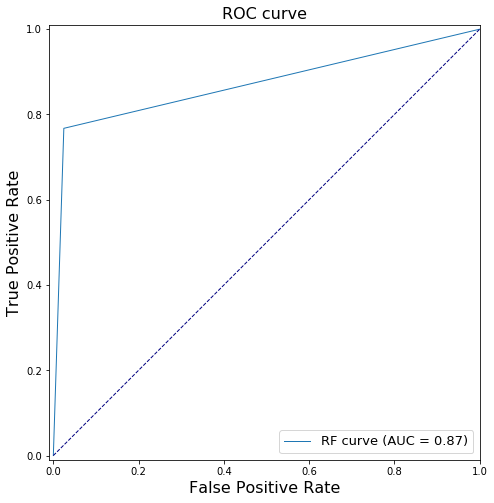

PCA Transformed - 11 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199
 0.80540433 0.70040574 0.42962264 0.39669824 0.33116408]
[[6826  165]
 [ 264  867]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.84      0.77      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.90      0.87      0.89      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


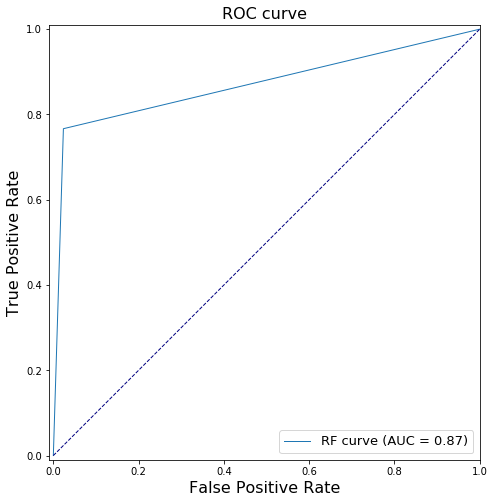

PCA Transformed - 12 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199
 0.80540433 0.70040574 0.42962264 0.39669824 0.33116408 0.26161422]
[[6824  167]
 [ 268  863]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.84      0.76      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.90      0.87      0.88      8122
weighted avg       0.94      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


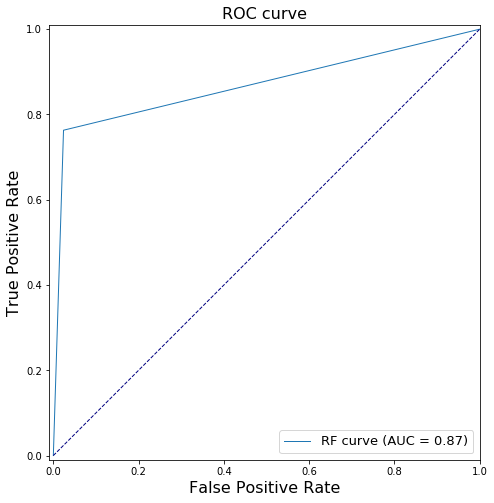

PCA Transformed - 13 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199
 0.80540433 0.70040574 0.42962264 0.39669824 0.33116408 0.26161422
 0.21986245]
[[6830  161]
 [ 262  869]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.84      0.77      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.90      0.87      0.89      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


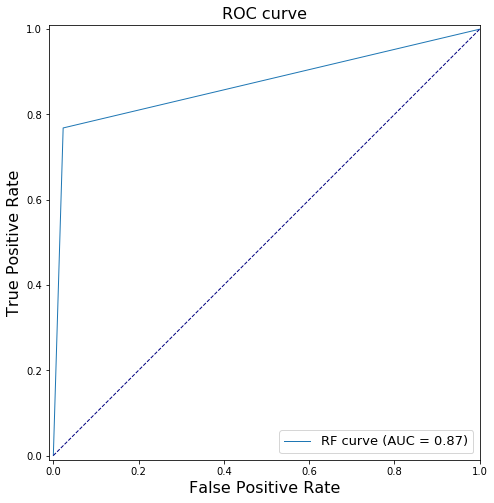

PCA Transformed - 14 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199
 0.80540433 0.70040574 0.42962264 0.39669824 0.33116408 0.26161422
 0.21986245 0.18208596]
[[6833  158]
 [ 254  877]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.85      0.78      0.81      1131

    accuracy                           0.95      8122
   macro avg       0.91      0.88      0.89      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


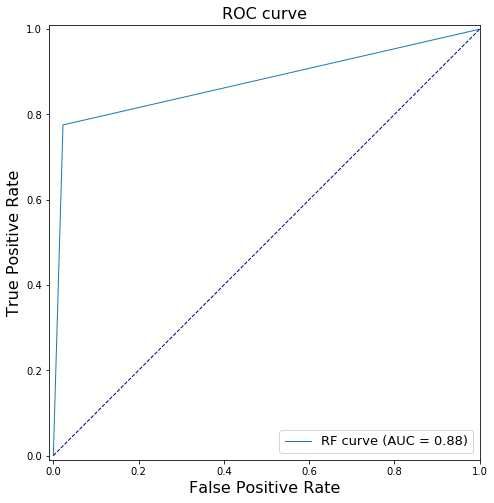

PCA Transformed - 15 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199
 0.80540433 0.70040574 0.42962264 0.39669824 0.33116408 0.26161422
 0.21986245 0.18208596 0.17021923]
[[6836  155]
 [ 259  872]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.85      0.77      0.81      1131

    accuracy                           0.95      8122
   macro avg       0.91      0.87      0.89      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


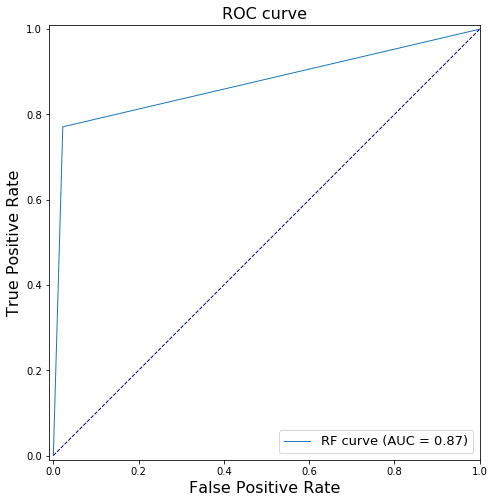

PCA Transformed - 16 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199
 0.80540433 0.70040574 0.42962264 0.39669824 0.33116408 0.26161422
 0.21986245 0.18208596 0.17021923 0.14047965]
[[6843  148]
 [ 267  864]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.85      0.76      0.81      1131

    accuracy                           0.95      8122
   macro avg       0.91      0.87      0.89      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


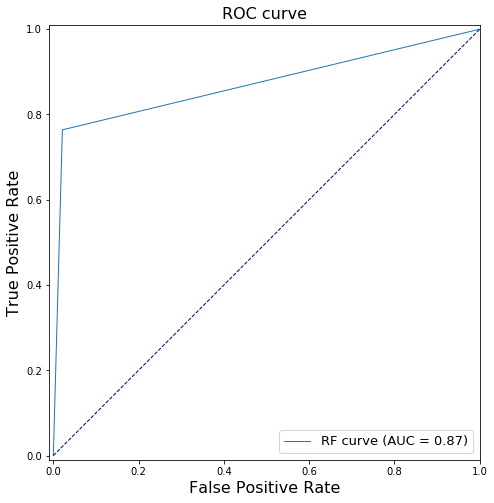

PCA Transformed - 17 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199
 0.80540433 0.70040574 0.42962264 0.39669824 0.33116408 0.26161422
 0.21986245 0.18208596 0.17021923 0.14047965 0.11460226]
[[6842  149]
 [ 275  856]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.85      0.76      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.91      0.87      0.89      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


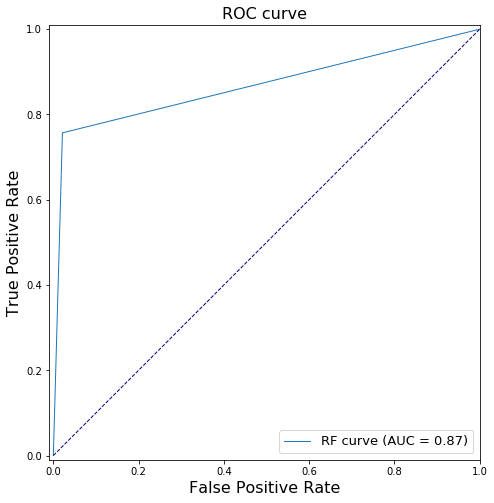

PCA Transformed - 18 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199
 0.80540433 0.70040574 0.42962264 0.39669824 0.33116408 0.26161422
 0.21986245 0.18208596 0.17021923 0.14047965 0.11460226 0.09969426]
[[6841  150]
 [ 270  861]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.85      0.76      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.91      0.87      0.89      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


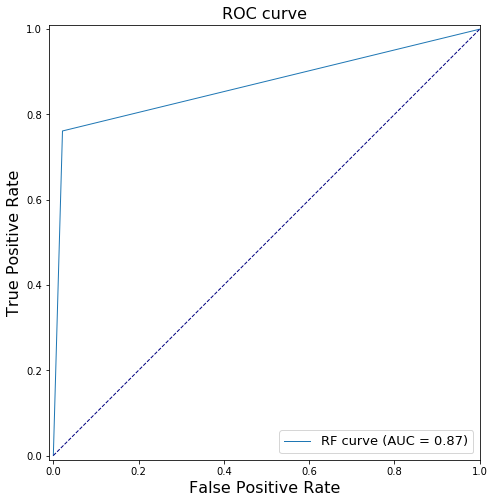

PCA Transformed - 19 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199
 0.80540433 0.70040574 0.42962264 0.39669824 0.33116408 0.26161422
 0.21986245 0.18208596 0.17021923 0.14047965 0.11460226 0.09969426
 0.09451851]
[[6837  154]
 [ 274  857]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.85      0.76      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.90      0.87      0.88      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


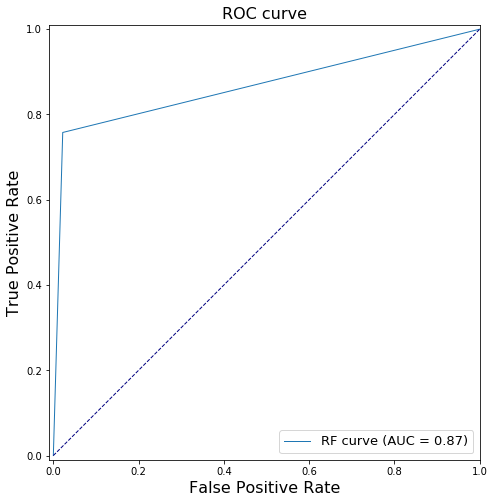

PCA Transformed - 20 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199
 0.80540433 0.70040574 0.42962264 0.39669824 0.33116408 0.26161422
 0.21986245 0.18208596 0.17021923 0.14047965 0.11460226 0.09969426
 0.09451851 0.05382847]
[[6841  150]
 [ 272  859]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.85      0.76      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.91      0.87      0.89      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


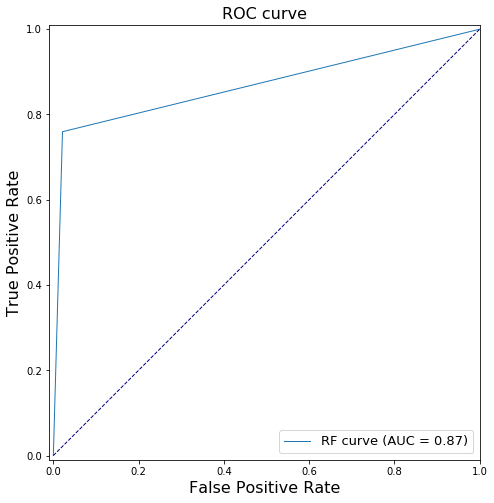

PCA Transformed - 21 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199
 0.80540433 0.70040574 0.42962264 0.39669824 0.33116408 0.26161422
 0.21986245 0.18208596 0.17021923 0.14047965 0.11460226 0.09969426
 0.09451851 0.05382847 0.03867329]
[[6838  153]
 [ 276  855]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.85      0.76      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.90      0.87      0.88      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


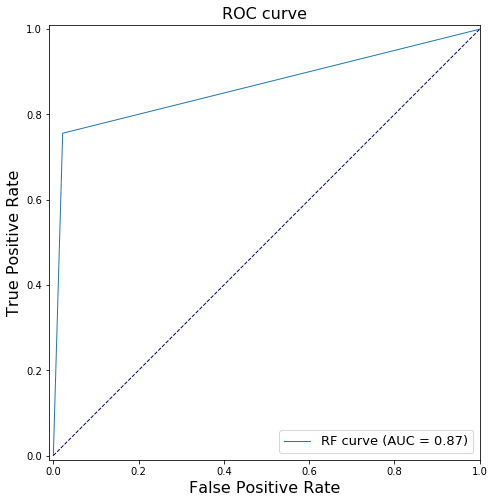

PCA Transformed - 22 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199
 0.80540433 0.70040574 0.42962264 0.39669824 0.33116408 0.26161422
 0.21986245 0.18208596 0.17021923 0.14047965 0.11460226 0.09969426
 0.09451851 0.05382847 0.03867329 0.02444932]
[[6843  148]
 [ 269  862]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.85      0.76      0.81      1131

    accuracy                           0.95      8122
   macro avg       0.91      0.87      0.89      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


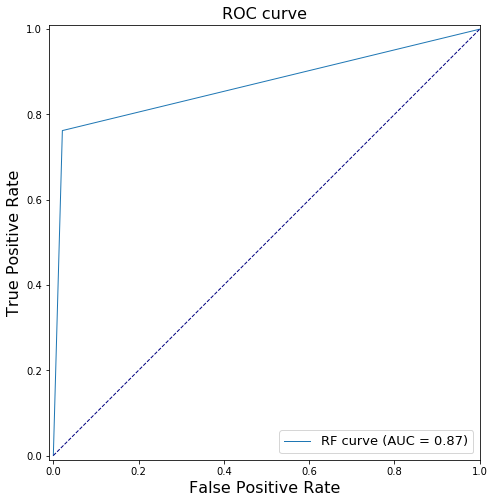

PCA Transformed - 23 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199
 0.80540433 0.70040574 0.42962264 0.39669824 0.33116408 0.26161422
 0.21986245 0.18208596 0.17021923 0.14047965 0.11460226 0.09969426
 0.09451851 0.05382847 0.03867329 0.02444932 0.02057413]
[[6850  141]
 [ 280  851]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.86      0.75      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.91      0.87      0.89      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


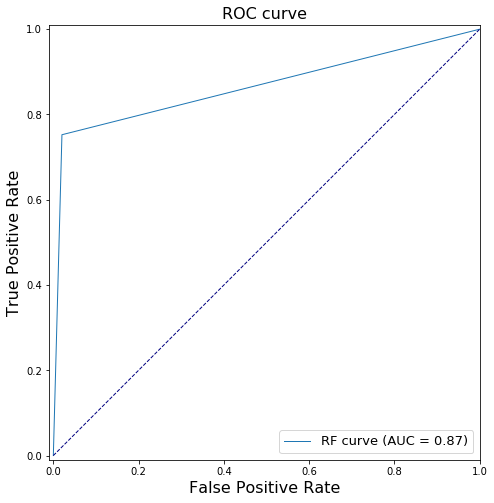

PCA Transformed - 24 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199
 0.80540433 0.70040574 0.42962264 0.39669824 0.33116408 0.26161422
 0.21986245 0.18208596 0.17021923 0.14047965 0.11460226 0.09969426
 0.09451851 0.05382847 0.03867329 0.02444932 0.02057413 0.01082089]
[[6845  146]
 [ 274  857]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.85      0.76      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.91      0.87      0.89      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


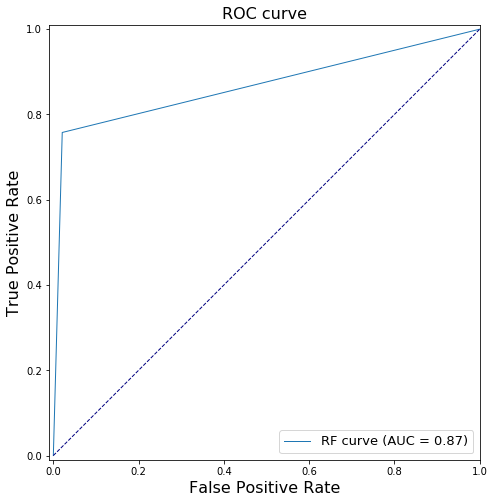

PCA Transformed - 25 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199
 0.80540433 0.70040574 0.42962264 0.39669824 0.33116408 0.26161422
 0.21986245 0.18208596 0.17021923 0.14047965 0.11460226 0.09969426
 0.09451851 0.05382847 0.03867329 0.02444932 0.02057413 0.01082089
 0.01024566]
[[6844  147]
 [ 274  857]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.85      0.76      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.91      0.87      0.89      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


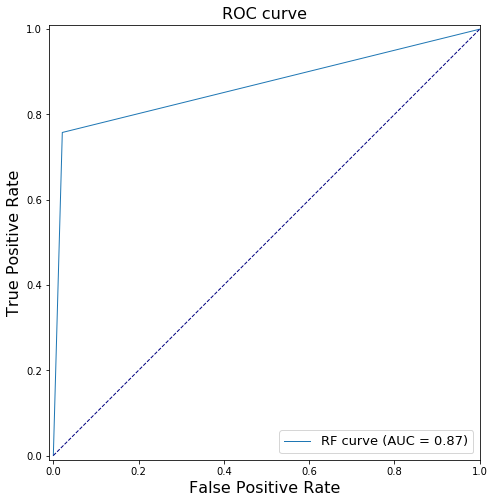

PCA Transformed - 26 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199
 0.80540433 0.70040574 0.42962264 0.39669824 0.33116408 0.26161422
 0.21986245 0.18208596 0.17021923 0.14047965 0.11460226 0.09969426
 0.09451851 0.05382847 0.03867329 0.02444932 0.02057413 0.01082089
 0.01024566 0.00415294]
[[6849  142]
 [ 265  866]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.86      0.77      0.81      1131

    accuracy                           0.95      8122
   macro avg       0.91      0.87      0.89      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


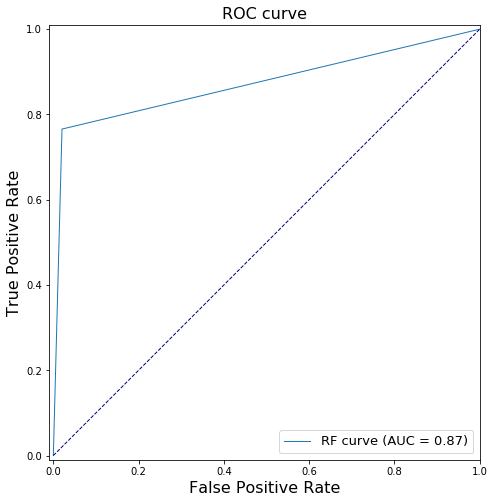

PCA Transformed - 27 dimensions is :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199
 0.80540433 0.70040574 0.42962264 0.39669824 0.33116408 0.26161422
 0.21986245 0.18208596 0.17021923 0.14047965 0.11460226 0.09969426
 0.09451851 0.05382847 0.03867329 0.02444932 0.02057413 0.01082089
 0.01024566 0.00415294 0.00354694]
[[6845  146]
 [ 274  857]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.85      0.76      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.91      0.87      0.89      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


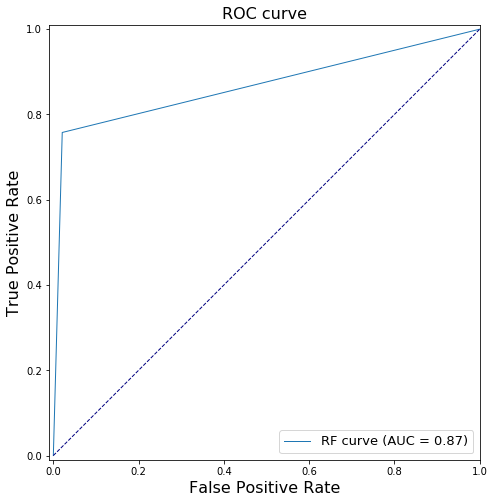

PCA Transformed - 28 dimensions is :-
[3.34790130e+00 2.79326062e+00 2.54042317e+00 2.13765024e+00
 1.23478614e+00 1.12989199e+00 8.05404335e-01 7.00405742e-01
 4.29622639e-01 3.96698243e-01 3.31164082e-01 2.61614215e-01
 2.19862454e-01 1.82085960e-01 1.70219232e-01 1.40479650e-01
 1.14602259e-01 9.96942574e-02 9.45185086e-02 5.38284702e-02
 3.86732880e-02 2.44493209e-02 2.05741331e-02 1.08208926e-02
 1.02456641e-02 4.15293981e-03 3.54694250e-03 2.14935049e-03]
[[6855  136]
 [ 282  849]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.86      0.75      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.91      0.87      0.89      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


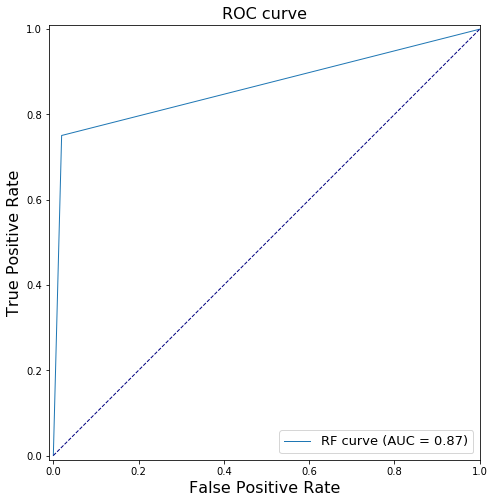

ValueError: n_components=29 must be between 0 and min(n_samples, n_features)=28 with svd_solver='full'

In [5]:
#Checking for best PCA dimention
print("Base Non-Tranformed data")
forest_test(X, Y)
for i in range (2,35):
    pca = PCA(n_components=i,svd_solver='full')
    X_pca = pca.fit_transform(X)
    print("PCA Transformed - "+str(i)+ " dimensions is :-" )
    print(pca.explained_variance_)
    forest_test(X_pca, Y)

PCA Transformed Best is in 8 dimensions Resulting in :-
[3.3479013  2.79326062 2.54042317 2.13765024 1.23478614 1.12989199
 0.80540433 0.70040574]
[[6811  180]
 [ 261  870]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6991
           1       0.83      0.77      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.90      0.87      0.88      8122
weighted avg       0.94      0.95      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


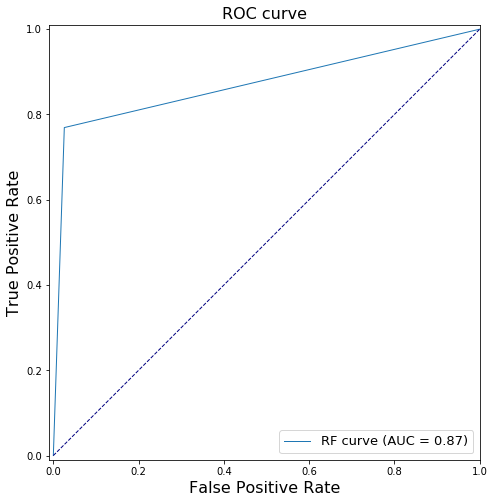

In [6]:
#Plotting Best PCA
pca = PCA(n_components=8,svd_solver='full')
X_pca = pca.fit_transform(X)
print("PCA Transformed Best is in 8 dimensions Resulting in :-" )
print(pca.explained_variance_)
forest_test(X_pca, Y)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 27072 samples in 0.198s...
[t-SNE] Computed neighbors for 27072 samples in 34.321s...
[t-SNE] Computed conditional probabilities for sample 1000 / 27072
[t-SNE] Computed conditional probabilities for sample 2000 / 27072
[t-SNE] Computed conditional probabilities for sample 3000 / 27072
[t-SNE] Computed conditional probabilities for sample 4000 / 27072
[t-SNE] Computed conditional probabilities for sample 5000 / 27072
[t-SNE] Computed conditional probabilities for sample 6000 / 27072
[t-SNE] Computed conditional probabilities for sample 7000 / 27072
[t-SNE] Computed conditional probabilities for sample 8000 / 27072
[t-SNE] Computed conditional probabilities for sample 9000 / 27072
[t-SNE] Computed conditional probabilities for sample 10000 / 27072
[t-SNE] Computed conditional probabilities for sample 11000 / 27072
[t-SNE] Computed conditional probabilities for sample 12000 / 27072
[t-SNE] Computed conditional probabilities for s

/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


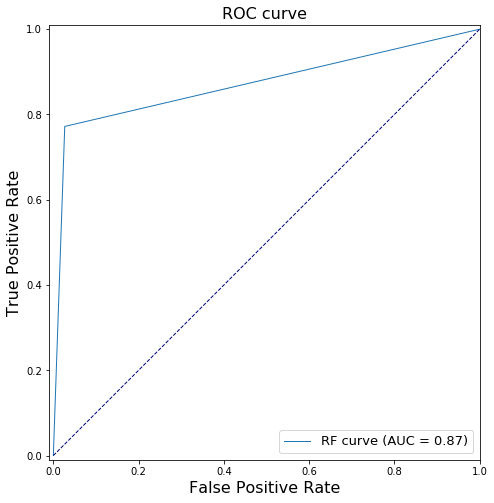

In [7]:
#tSNE dimension reduction
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=600)
X_tsne = tsne.fit_transform(X)
forest_test(X_tsne, Y)

Base Non-Tranformed data
[[6833  158]
 [ 236  895]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      6991
           1       0.85      0.79      0.82      1131

    accuracy                           0.95      8122
   macro avg       0.91      0.88      0.90      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


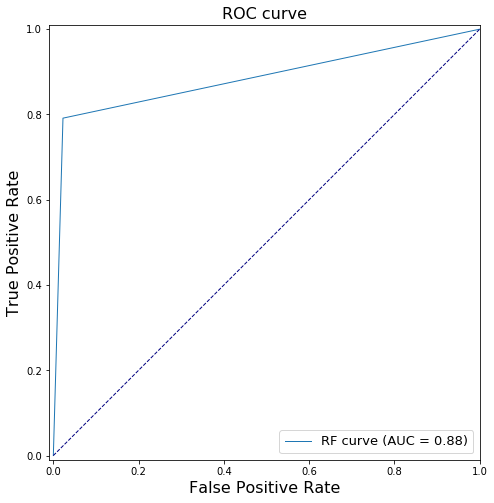

LLE Transformed - 1 dimensions is :-
[[6452  539]
 [ 357  774]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      6991
           1       0.59      0.68      0.63      1131

    accuracy                           0.89      8122
   macro avg       0.77      0.80      0.78      8122
weighted avg       0.90      0.89      0.89      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


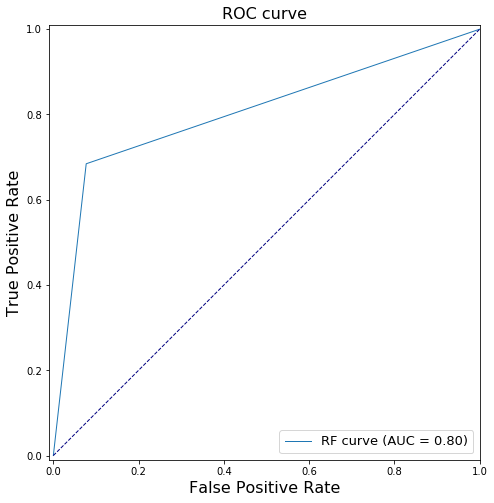

LLE Transformed - 2 dimensions is :-
[[6716  275]
 [ 336  795]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      6991
           1       0.74      0.70      0.72      1131

    accuracy                           0.92      8122
   macro avg       0.85      0.83      0.84      8122
weighted avg       0.92      0.92      0.92      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


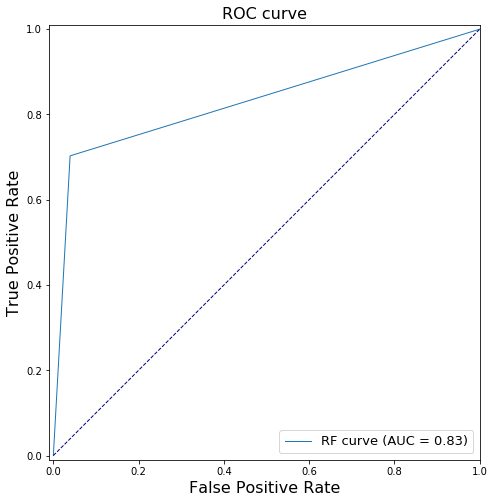

LLE Transformed - 3 dimensions is :-
[[6777  214]
 [ 343  788]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6991
           1       0.79      0.70      0.74      1131

    accuracy                           0.93      8122
   macro avg       0.87      0.83      0.85      8122
weighted avg       0.93      0.93      0.93      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


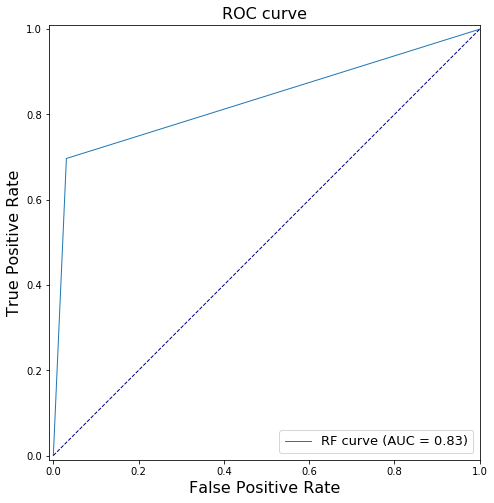

LLE Transformed - 4 dimensions is :-
[[6774  217]
 [ 341  790]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6991
           1       0.78      0.70      0.74      1131

    accuracy                           0.93      8122
   macro avg       0.87      0.83      0.85      8122
weighted avg       0.93      0.93      0.93      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


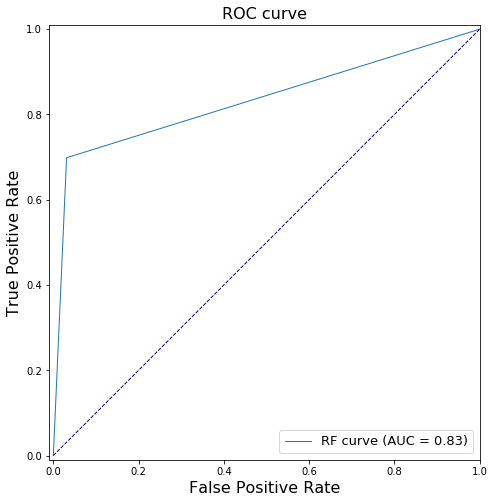

LLE Transformed - 5 dimensions is :-
[[6760  231]
 [ 339  792]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6991
           1       0.77      0.70      0.74      1131

    accuracy                           0.93      8122
   macro avg       0.86      0.83      0.85      8122
weighted avg       0.93      0.93      0.93      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


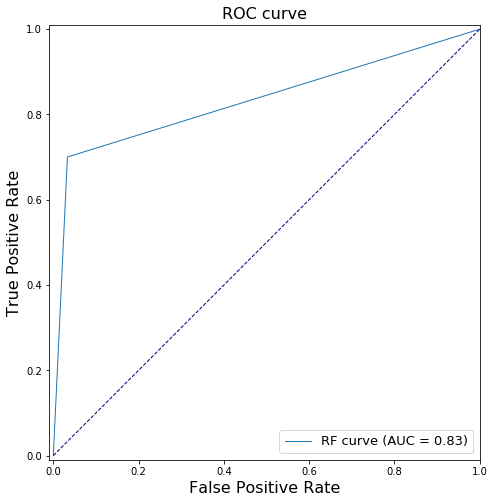

LLE Transformed - 6 dimensions is :-
[[6752  239]
 [ 361  770]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6991
           1       0.76      0.68      0.72      1131

    accuracy                           0.93      8122
   macro avg       0.86      0.82      0.84      8122
weighted avg       0.92      0.93      0.92      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


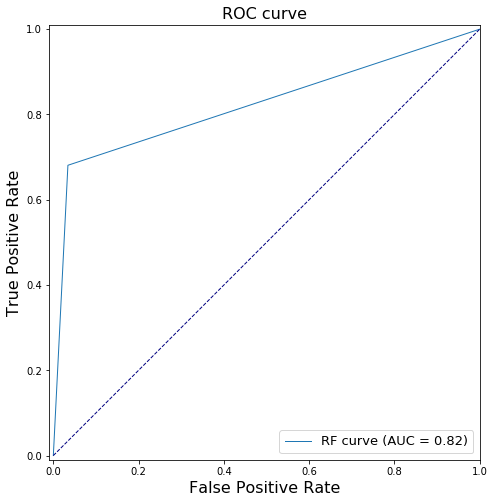

LLE Transformed - 7 dimensions is :-
[[6769  222]
 [ 338  793]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6991
           1       0.78      0.70      0.74      1131

    accuracy                           0.93      8122
   macro avg       0.87      0.83      0.85      8122
weighted avg       0.93      0.93      0.93      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


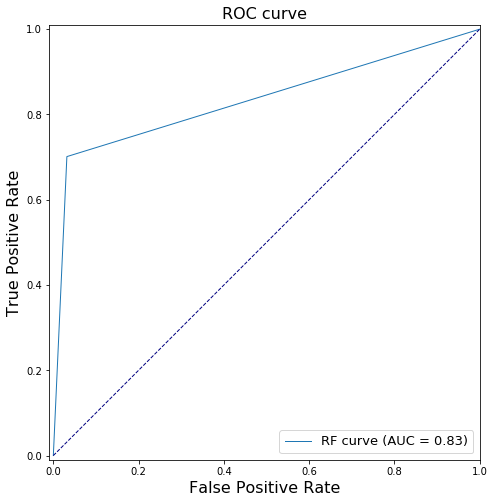

LLE Transformed - 8 dimensions is :-
[[6758  233]
 [ 324  807]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6991
           1       0.78      0.71      0.74      1131

    accuracy                           0.93      8122
   macro avg       0.87      0.84      0.85      8122
weighted avg       0.93      0.93      0.93      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


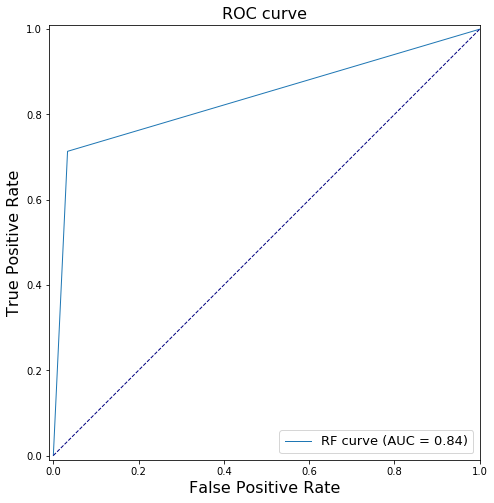

LLE Transformed - 9 dimensions is :-
[[6730  261]
 [ 218  913]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6991
           1       0.78      0.81      0.79      1131

    accuracy                           0.94      8122
   macro avg       0.87      0.88      0.88      8122
weighted avg       0.94      0.94      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


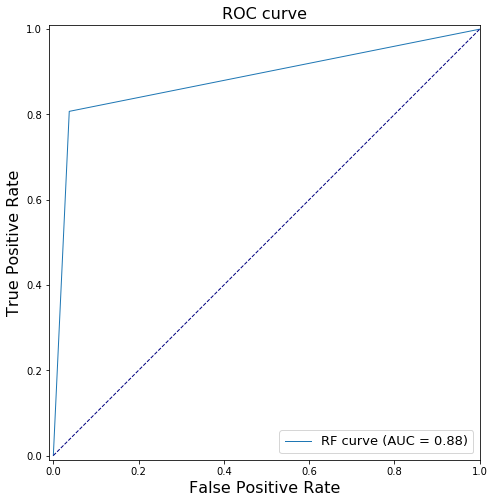

LLE Transformed - 10 dimensions is :-
[[6730  261]
 [ 214  917]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      6991
           1       0.78      0.81      0.79      1131

    accuracy                           0.94      8122
   macro avg       0.87      0.89      0.88      8122
weighted avg       0.94      0.94      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


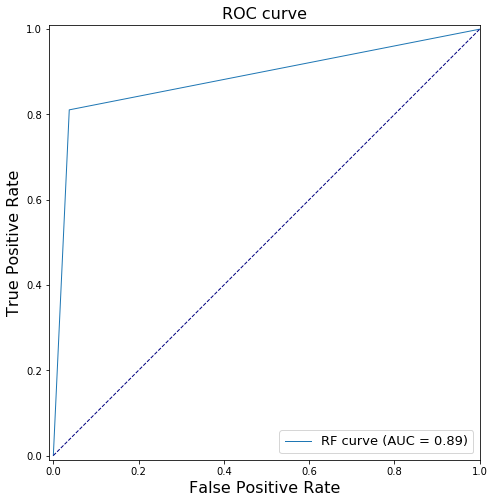

In [ ]:
#Checking for best LLE dimention
print("Base Non-Tranformed data")
forest_test(X, Y)
for i in range (1,30):
    embedding = LocallyLinearEmbedding(n_components=i)

# run an LLE and use it to transform the features
    X_lle = embedding.fit_transform(X)
    print("LLE Transformed - "+str(i)+ " dimensions is :-" )
    forest_test(X_lle, Y)

Best performing LLE Transformed - is in 10 dimensions:-
[[6651  340]
 [ 156  975]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      6991
           1       0.74      0.86      0.80      1131

    accuracy                           0.94      8122
   macro avg       0.86      0.91      0.88      8122
weighted avg       0.94      0.94      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


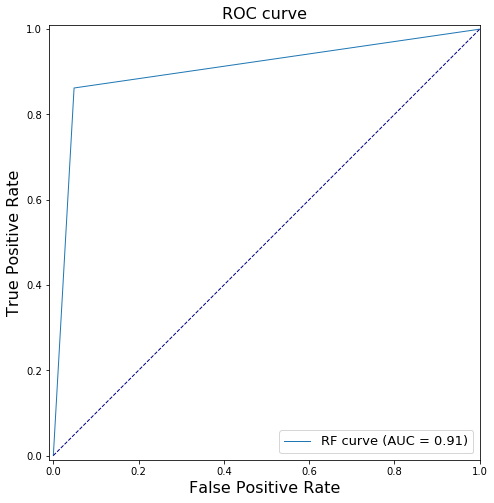

In [9]:
#Plotting Best LLE
embedding = LocallyLinearEmbedding(n_components=10)
X_lle = embedding.fit_transform(X)
print("Best performing LLE Transformed - is in 10 dimensions:-" )
forest_test(X_lle, Y)

LDA Transformed Best is in 1 dimensions is :-
[[6538  453]
 [ 458  673]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6991
           1       0.60      0.60      0.60      1131

    accuracy                           0.89      8122
   macro avg       0.77      0.77      0.77      8122
weighted avg       0.89      0.89      0.89      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


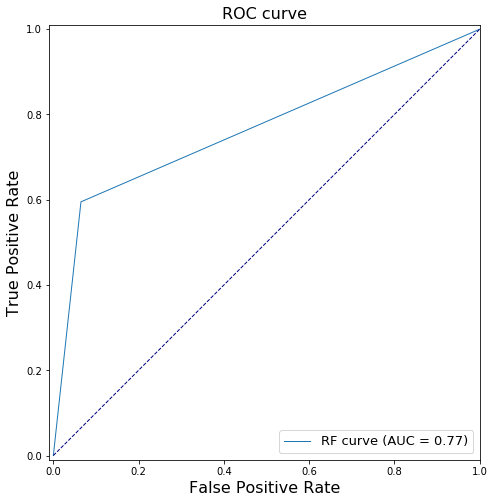

In [5]:
#Plotting Best LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit(X, Y).transform(X)
print("LDA Transformed Best is in 1 dimensions is :-" )
forest_test(X_lda, Y)

Base Non-Tranformed data
[[6825  166]
 [ 239  892]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      6991
           1       0.84      0.79      0.81      1131

    accuracy                           0.95      8122
   macro avg       0.90      0.88      0.89      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


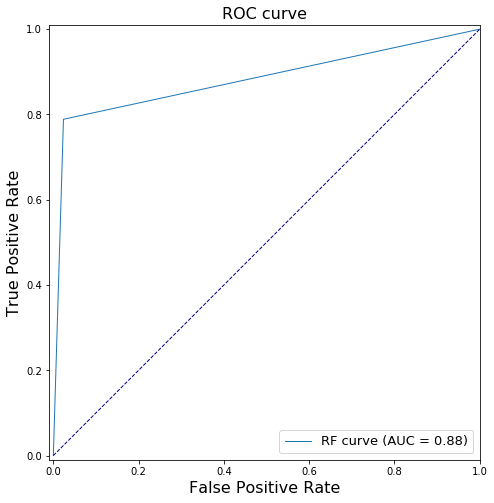

ICA Transformed - 3 dimensions is :-
[[6760  231]
 [ 360  771]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6991
           1       0.77      0.68      0.72      1131

    accuracy                           0.93      8122
   macro avg       0.86      0.82      0.84      8122
weighted avg       0.92      0.93      0.93      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


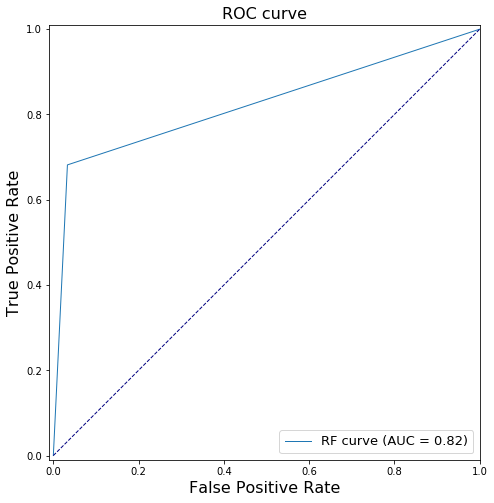

ICA Transformed - 4 dimensions is :-
[[6792  199]
 [ 309  822]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      6991
           1       0.81      0.73      0.76      1131

    accuracy                           0.94      8122
   macro avg       0.88      0.85      0.86      8122
weighted avg       0.94      0.94      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


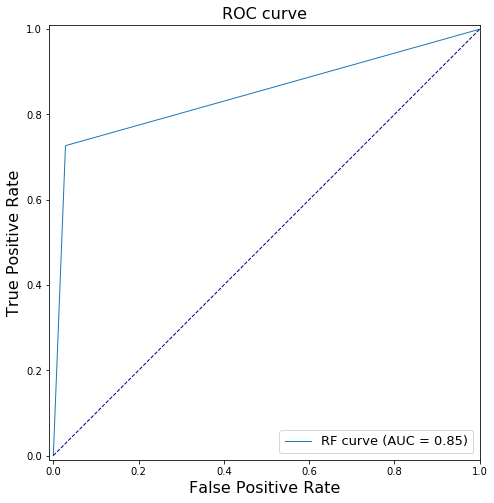

ICA Transformed - 5 dimensions is :-
[[6799  192]
 [ 281  850]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6991
           1       0.82      0.75      0.78      1131

    accuracy                           0.94      8122
   macro avg       0.89      0.86      0.87      8122
weighted avg       0.94      0.94      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


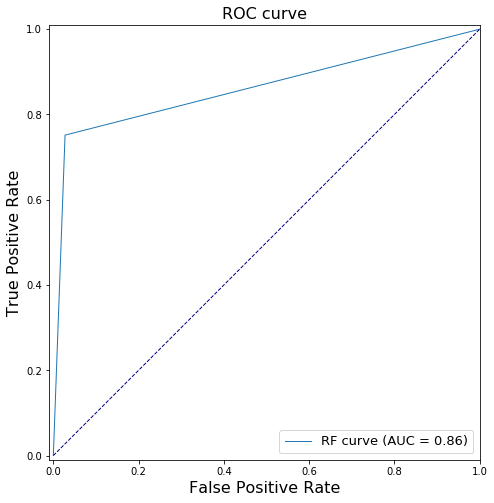

ICA Transformed - 6 dimensions is :-
[[6804  187]
 [ 270  861]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6991
           1       0.82      0.76      0.79      1131

    accuracy                           0.94      8122
   macro avg       0.89      0.87      0.88      8122
weighted avg       0.94      0.94      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


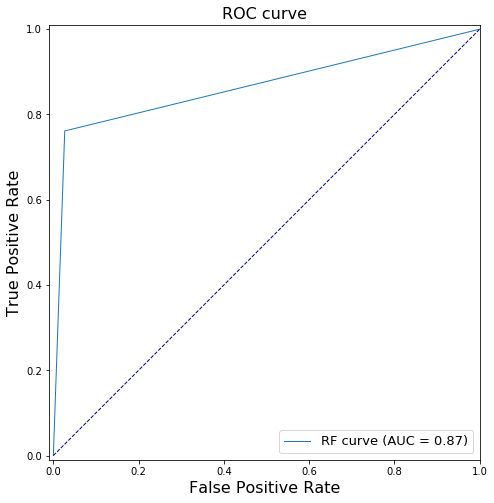

ICA Transformed - 7 dimensions is :-
[[6808  183]
 [ 284  847]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6991
           1       0.82      0.75      0.78      1131

    accuracy                           0.94      8122
   macro avg       0.89      0.86      0.88      8122
weighted avg       0.94      0.94      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


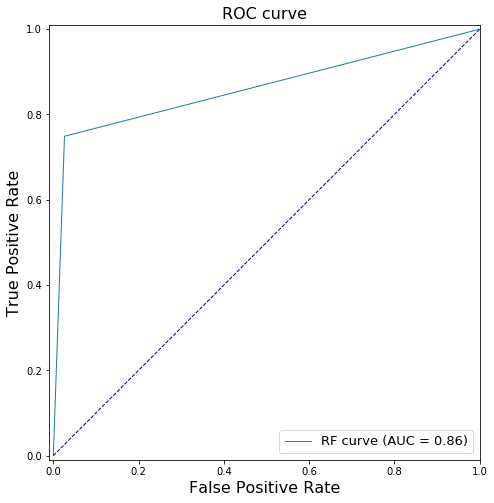

/home/bl21user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


ICA Transformed - 8 dimensions is :-
[[6823  168]
 [ 266  865]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.84      0.76      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.90      0.87      0.88      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


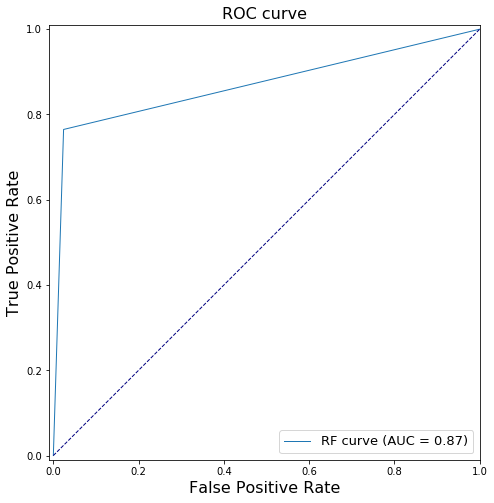

/home/bl21user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


ICA Transformed - 9 dimensions is :-
[[6816  175]
 [ 253  878]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6991
           1       0.83      0.78      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.90      0.88      0.89      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


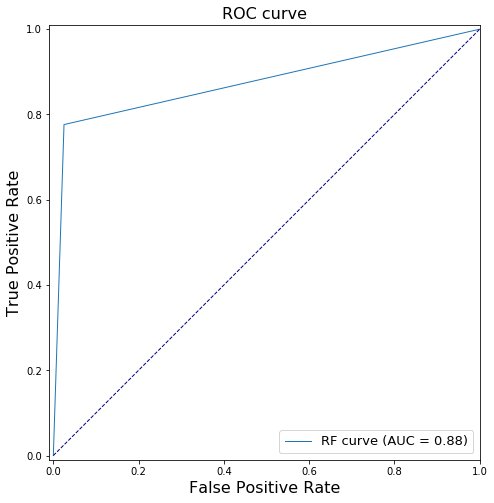

ICA Transformed - 10 dimensions is :-
[[6818  173]
 [ 261  870]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.83      0.77      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.90      0.87      0.88      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


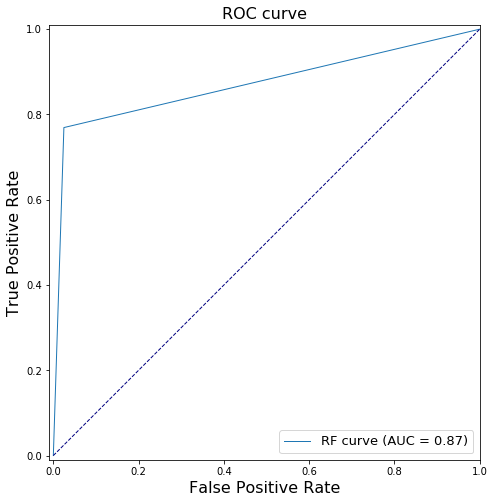

ICA Transformed - 11 dimensions is :-
[[6811  180]
 [ 281  850]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6991
           1       0.83      0.75      0.79      1131

    accuracy                           0.94      8122
   macro avg       0.89      0.86      0.88      8122
weighted avg       0.94      0.94      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


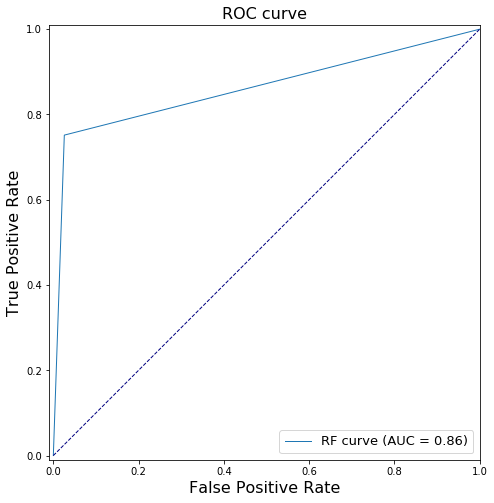

ICA Transformed - 12 dimensions is :-
[[6810  181]
 [ 279  852]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6991
           1       0.82      0.75      0.79      1131

    accuracy                           0.94      8122
   macro avg       0.89      0.86      0.88      8122
weighted avg       0.94      0.94      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


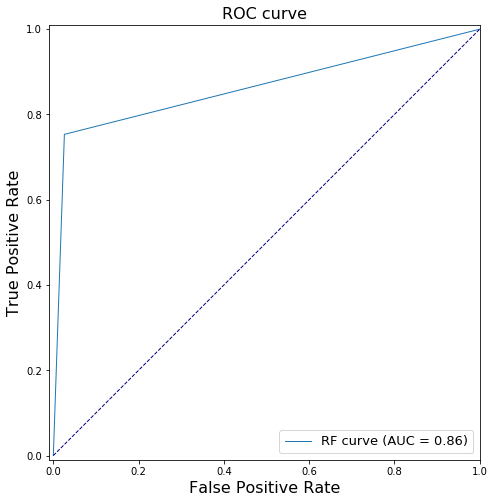

ICA Transformed - 13 dimensions is :-
[[6825  166]
 [ 276  855]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.84      0.76      0.79      1131

    accuracy                           0.95      8122
   macro avg       0.90      0.87      0.88      8122
weighted avg       0.94      0.95      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


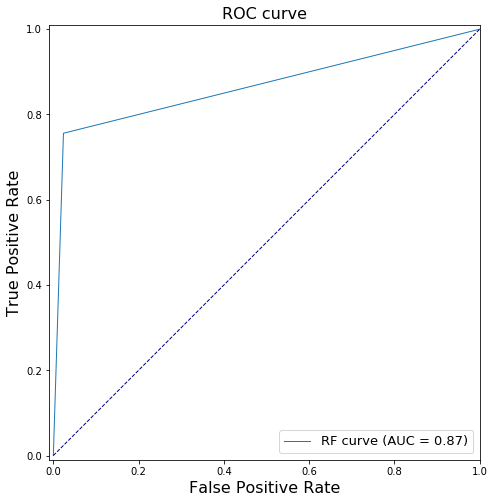

ICA Transformed - 14 dimensions is :-
[[6829  162]
 [ 285  846]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.84      0.75      0.79      1131

    accuracy                           0.94      8122
   macro avg       0.90      0.86      0.88      8122
weighted avg       0.94      0.94      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


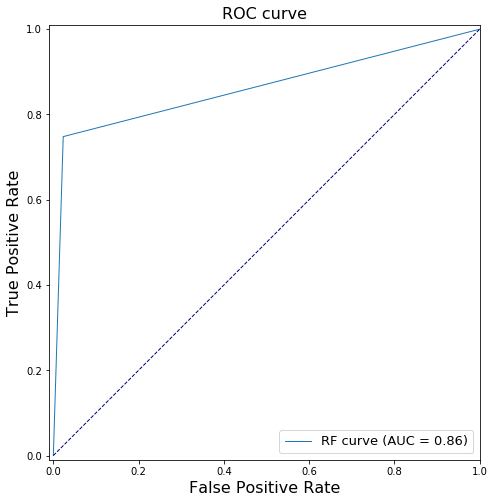

ICA Transformed - 15 dimensions is :-
[[6830  161]
 [ 290  841]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.84      0.74      0.79      1131

    accuracy                           0.94      8122
   macro avg       0.90      0.86      0.88      8122
weighted avg       0.94      0.94      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


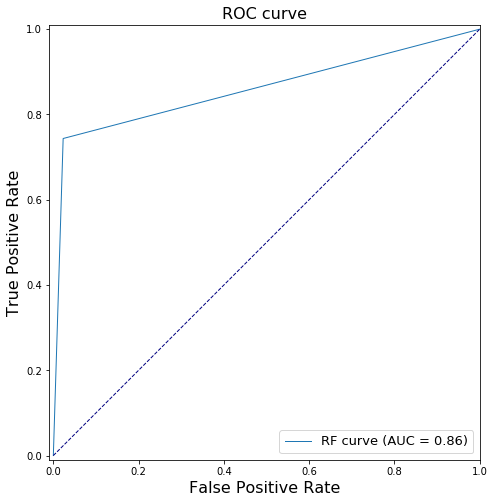

/home/bl21user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


ICA Transformed - 16 dimensions is :-
[[6819  172]
 [ 281  850]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.83      0.75      0.79      1131

    accuracy                           0.94      8122
   macro avg       0.90      0.86      0.88      8122
weighted avg       0.94      0.94      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


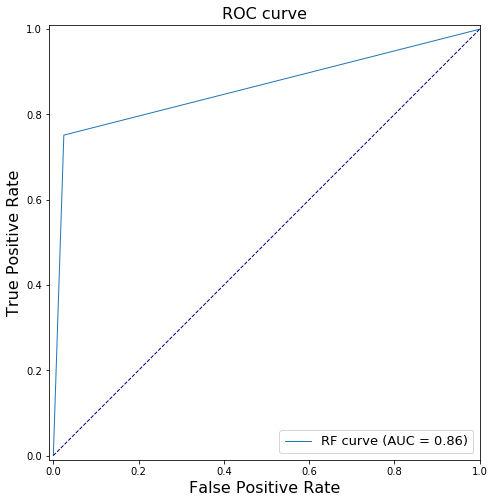

/home/bl21user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


ICA Transformed - 17 dimensions is :-
[[6821  170]
 [ 293  838]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.83      0.74      0.78      1131

    accuracy                           0.94      8122
   macro avg       0.90      0.86      0.88      8122
weighted avg       0.94      0.94      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


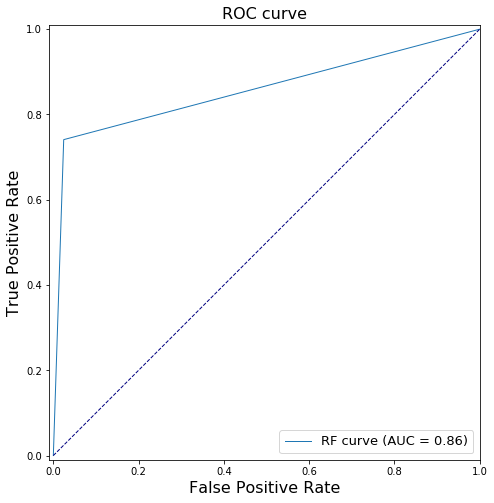

/home/bl21user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


ICA Transformed - 18 dimensions is :-
[[6832  159]
 [ 289  842]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.84      0.74      0.79      1131

    accuracy                           0.94      8122
   macro avg       0.90      0.86      0.88      8122
weighted avg       0.94      0.94      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


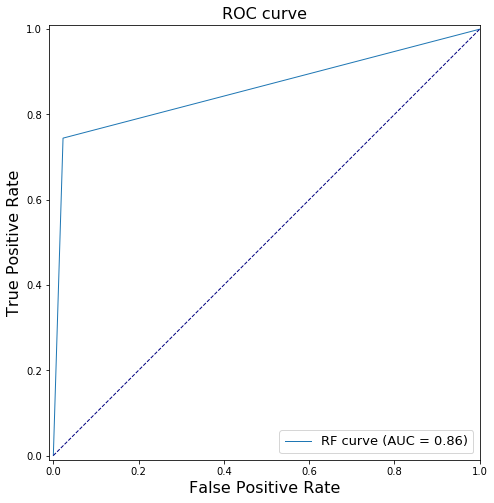

/home/bl21user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


ICA Transformed - 19 dimensions is :-
[[6827  164]
 [ 286  845]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.84      0.75      0.79      1131

    accuracy                           0.94      8122
   macro avg       0.90      0.86      0.88      8122
weighted avg       0.94      0.94      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


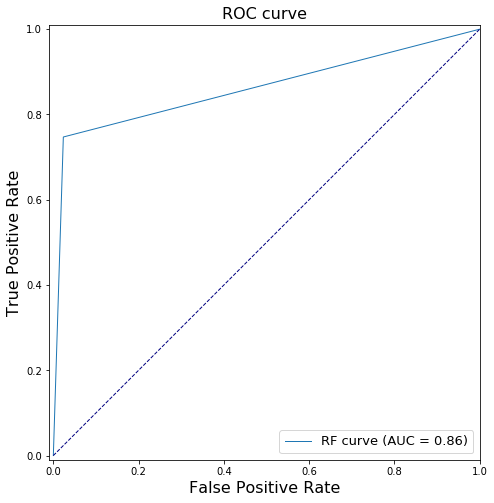

ICA Transformed - 20 dimensions is :-
[[6829  162]
 [ 274  857]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.84      0.76      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.90      0.87      0.88      8122
weighted avg       0.94      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


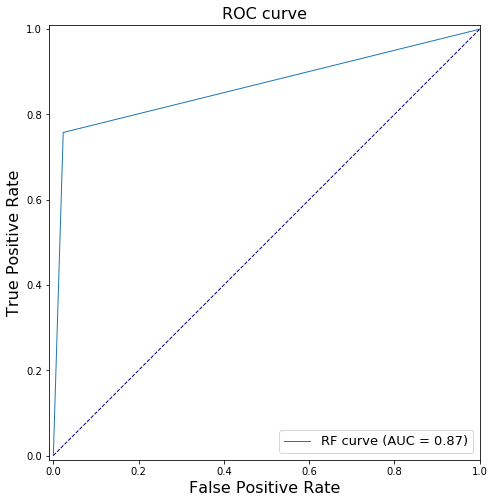

ICA Transformed - 21 dimensions is :-
[[6839  152]
 [ 280  851]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.85      0.75      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.90      0.87      0.88      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


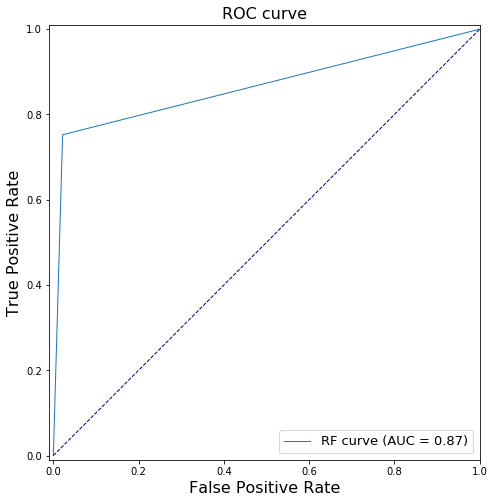

ICA Transformed - 22 dimensions is :-
[[6847  144]
 [ 290  841]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.85      0.74      0.79      1131

    accuracy                           0.95      8122
   macro avg       0.91      0.86      0.88      8122
weighted avg       0.94      0.95      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


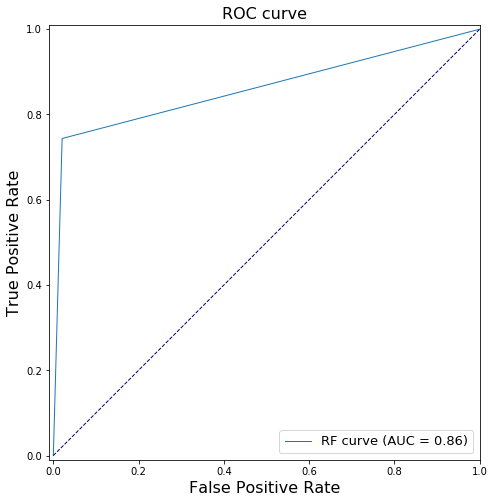

ICA Transformed - 23 dimensions is :-
[[6847  144]
 [ 286  845]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.85      0.75      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.91      0.86      0.88      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


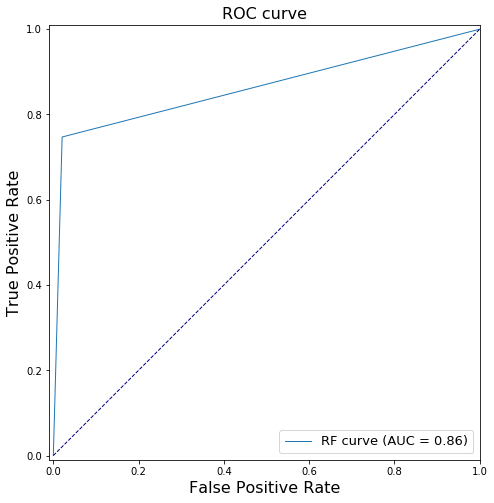

ICA Transformed - 24 dimensions is :-
[[6851  140]
 [ 317  814]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.85      0.72      0.78      1131

    accuracy                           0.94      8122
   macro avg       0.90      0.85      0.87      8122
weighted avg       0.94      0.94      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


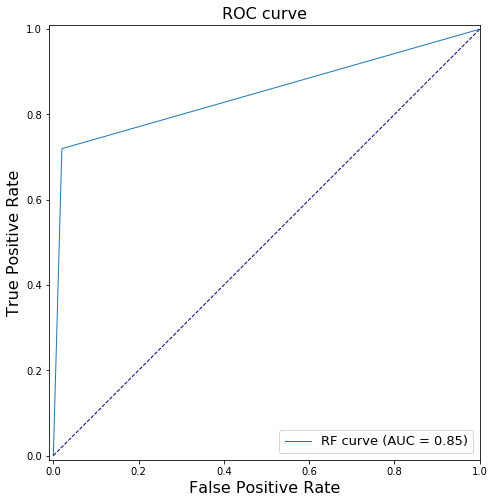

ICA Transformed - 25 dimensions is :-
[[6845  146]
 [ 299  832]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.85      0.74      0.79      1131

    accuracy                           0.95      8122
   macro avg       0.90      0.86      0.88      8122
weighted avg       0.94      0.95      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


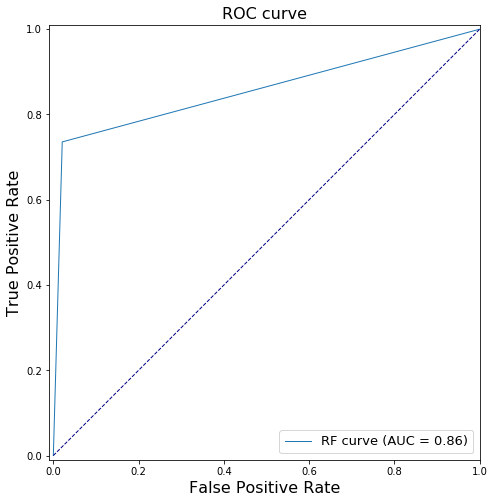

ICA Transformed - 26 dimensions is :-
[[6849  142]
 [ 307  824]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.85      0.73      0.79      1131

    accuracy                           0.94      8122
   macro avg       0.91      0.85      0.88      8122
weighted avg       0.94      0.94      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


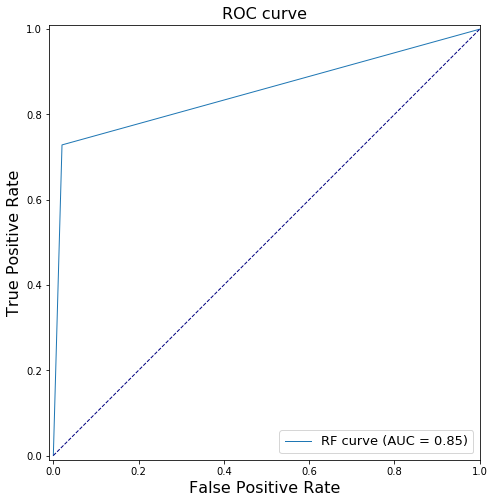

ICA Transformed - 27 dimensions is :-
[[6842  149]
 [ 291  840]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.85      0.74      0.79      1131

    accuracy                           0.95      8122
   macro avg       0.90      0.86      0.88      8122
weighted avg       0.94      0.95      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


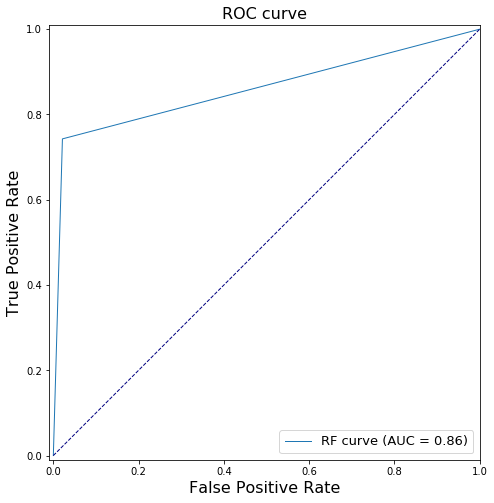

/home/bl21user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:470: UserWarning: n_components is too large: it will be set to 27
  % n_components


ICA Transformed - 28 dimensions is :-
[[6850  141]
 [ 284  847]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.86      0.75      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.91      0.86      0.88      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


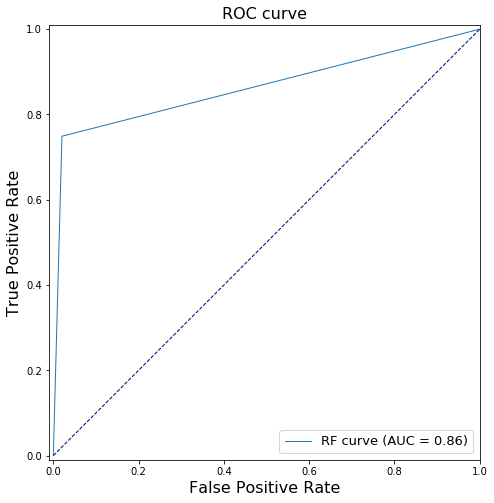

/home/bl21user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:470: UserWarning: n_components is too large: it will be set to 27
  % n_components


ICA Transformed - 29 dimensions is :-
[[6854  137]
 [ 300  831]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.86      0.73      0.79      1131

    accuracy                           0.95      8122
   macro avg       0.91      0.86      0.88      8122
weighted avg       0.94      0.95      0.94      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


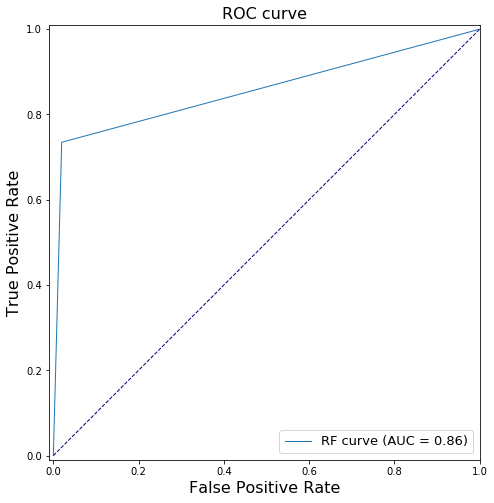

In [6]:
#Checking for best ICA dimention
print("Base Non-Tranformed data")
forest_test(X, Y)
for i in range (3,30):
    ica = FastICA(n_components=i)
    X_ica = ica.fit_transform(X)
    print("ICA Transformed - "+str(i)+ " dimensions is :-" )
    forest_test(X_ica, Y)

/home/bl21user/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Best ICA Transformed in 9 dimensions is :-
[[6832  159]
 [ 273  858]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6991
           1       0.84      0.76      0.80      1131

    accuracy                           0.95      8122
   macro avg       0.90      0.87      0.88      8122
weighted avg       0.95      0.95      0.95      8122



/home/bl21user/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


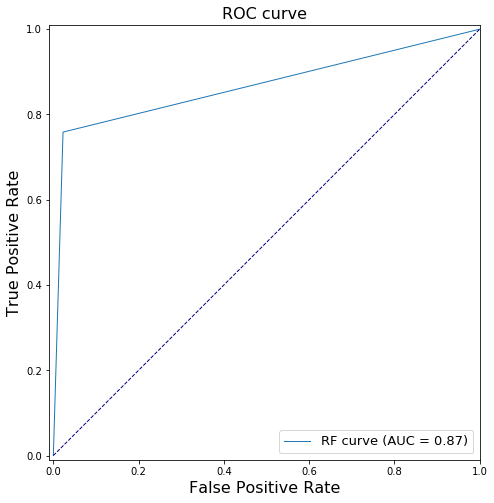

In [8]:
#Plotting Best ICA
ica = FastICA(n_components=9)
X_ica = ica.fit_transform(X)
print("Best ICA Transformed in 9 dimensions is :-" )
forest_test(X_ica, Y)